In [1]:
from utils.simulation.sim_utils import RandomSimulator
from utils.core.save_manager import SaveUtils
from utils.data_io import load_data
import os
from utils.eda.visualisation import Visualisation
from utils.eda.correlation import CorrelationAnalyzer
import pandas as pd
from utils.simulation.decomposition import Decomposer
from utils.simulation.covariance_matrix import CovarianceMatrix

🧪 Simulating Unscaled Normally Distributed Data with Specified Skewness and Kurtosis

In [2]:
simulator = RandomSimulator(num_simulations=1000)
df = simulator.simulate_normal(num_variables=10, target_skew=0, target_kurt=3)

save_util = SaveUtils()
save_util.save_dataframe_to_csv(df,os.path.join(os.getcwd(), "data/output/simulated_normal.csv"), overwrite=True)

Data saved to c:\Data Science Projects\Daanish\projects\simulation\data/output/simulated_normal.csv successfully.


🧪 Simulate scaled normals (e.g., volatilities)

In [3]:
# params = [0.2, 0.15, 0.3]  # std devs or volatilities
# simulator = RandomSimulator(parameters=params)
# df = simulator.simulate_normal(target_skew=0, target_kurt=3)

📊 Simulating Poisson Data from Excel Input
- Reads input data from an Excel file
- Initializes a Poisson simulator
- Simulates Poisson-distributed values
- Saves the simulated data to an Excel file

In [4]:
df = load_data(
    source_type='excel',
    input_path= os.path.join(os.getcwd(), "data/input/Poisson Simulation.xlsx"),
    sheet_name='Lambda Calculation',
    usecols=['Lambda']
)
simulator = RandomSimulator(parameters=df['Lambda'],num_simulations = 10000)
sim = simulator.simulate_poisson()
save_util.save_dataframe_to_excel(
    sim,
    os.path.join(os.getcwd(), "data/output/simulated_poisson.xlsx"),
    sheet_name="simulated values", 
    overwrite=True
    )


Excel file saved to c:\Data Science Projects\Daanish\projects\simulation\data/output/simulated_poisson.xlsx successfully.


#### 🔗 2.5 Examine Variable Correlations

This section calculates and displays correlations between different types of variables in the `main_df`.

- **`num_method` (str)**: Defines the method for calculating correlation between numerical variables. Allowed values are:
    - `'pearson'` *(default)*: Standard Pearson linear correlation coefficient.
    - `'spearman'`: Spearman's rank correlation coefficient (for monotonic relationships).
    - `'kendall'`: Kendall's tau correlation coefficient (for ordinal or non-normally distributed data).

- **`cat_method` (str)**: Defines the method for calculating association between categorical variables. Allowed values are:
    - `'cramers_v'` *(default)*: Cramer's V (measures association between nominal categorical variables).
    - `'mutual_info'`: Mutual Information (measures the statistical dependence between two random variables).

- **`cat_num_method` (str)**: Defines the method for calculating association between categorical and numerical variables. Allowed values are:
    - `'correlation_ratio'` *(default)*: Correlation Ratio (Eta squared, measures variance explained).
    - `'f_test'`: F-statistic from ANOVA (assesses the difference in means across categories).
    - `'mutual_info'`: Mutual Information (measures the statistical dependence). 
    - `'kruskal'`: Non-parametric alternative to ANOVA. Compares distributions of a continuous variable across categories. Good when your numerical variables are not normally distributed
    - `'target_spearman'`: Replaces each category with the mean of the target variable (e.g. default rate). Then computes correlation with numerical features. Captures ordinal structure or monotonic trends across groups

In [5]:
main_df = load_data(
    source_type='csv',
    input_path= os.path.join(os.getcwd(), "data/input/Correlation Analysis - Raw Data.csv"),
)

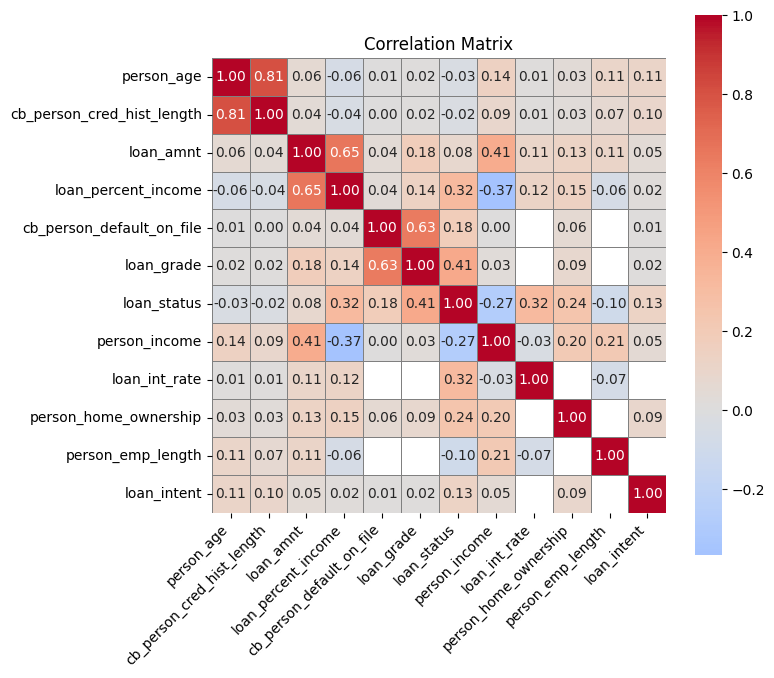

In [6]:
analyzer = CorrelationAnalyzer(main_df)
corr_df,corr_matrix = analyzer.correlation_matrix(num_method="spearman", cat_method="cramers_v",
                                      cat_num_method="correlation_ratio",return_matrix=True)

Visualisation.plot_heatmap_matrix(corr_matrix, title="Correlation Matrix")

CovarianceMatrix
----------------
A utility class for calculating the covariance matrix of asset returns,
optionally annualized. Intended for use in financial simulations such as
Monte Carlo modeling.

In [7]:
cov_calc = CovarianceMatrix(main_df)
cov_matrix = cov_calc.get_matrix()
print(cov_matrix)

                              person_age  person_income  person_emp_length  \
person_age                     40.298100   6.815063e+04           4.297555   
person_income               68150.625897   3.841907e+09       34723.451508   
person_emp_length               4.297555   3.472345e+04          17.161385   
loan_amnt                    2038.242540   1.045568e+08        2968.253281   
loan_int_rate                   0.256826   1.588211e+02          -0.756774   
loan_status                    -0.056708  -3.697817e+03          -0.140489   
loan_percent_income            -0.028749  -1.684259e+03          -0.023828   
cb_person_cred_hist_length     22.115347   2.965507e+04           2.434221   

                               loan_amnt  loan_int_rate  loan_status  \
person_age                  2.038243e+03       0.256826    -0.056708   
person_income               1.045568e+08     158.821130 -3697.817278   
person_emp_length           2.968253e+03      -0.756774    -0.140489   
loan_amnt

#### Cholesky Decomposition and Visualisation

We perform a Cholesky decomposition on the correlation matrix to obtain a lower triangular matrix.  
This decomposition is useful for simulations and generating correlated random variables.  
We then visualise the resulting matrix using a heatmap for better interpretation.

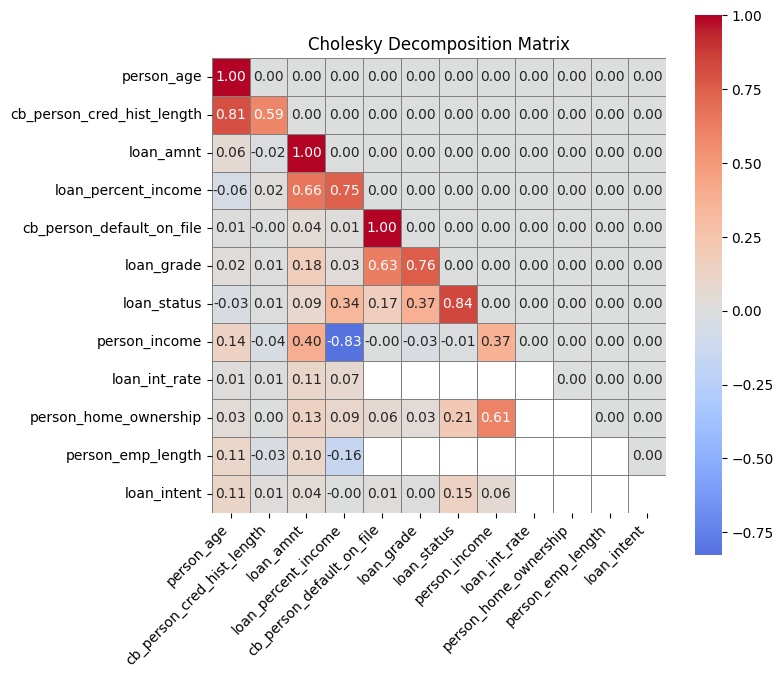

In [ ]:
Decomposition_df = Decomposer.cholesky_decomposition(cov_matrix)
Visualisation.plot_heatmap_matrix(Decomposition_df, title="Cholesky Decomposition Matrix")
